# Comparando Histogramas

## Objetivo: Aprofundar o conhecimento de histogramas, e entender como comparar diferentes histogramas visualmente.

In [1]:
import os
import pandas as pd

repo_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_patch = os.path.join(repo_dir, "materiais", "survey_results_public.csv")
df = pd.read_csv(file_patch, index_col="ResponseId")
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

### Variáveis para comparação: categorias

Em muitos casos, vamos querer olhar para alguns dos nossos dados *em comparação* com outros dados.

Temos muitas colunas categóricas que podem ser interessantes para usarmos como variável de segmentação! Por exemplo:

In [3]:
df['Age']

ResponseId
1                    NaN
2                    NaN
3        25-34 years old
4        35-44 years old
5        25-34 years old
              ...       
73264    25-34 years old
73265    25-34 years old
73266    55-64 years old
73267    55-64 years old
73268    25-34 years old
Name: Age, Length: 73268, dtype: object

A idade foi tratada como uma categoria. Vamos ver todos os valores possíveis para essa variável, usando o método `.unique()`:

In [4]:
df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

São poucas categorias, então é uma boa variável para segmentar (categorias demais podem ser úteis para algumas análises, mas podem acabar segmentando demais os dados).

### Limpando os dados
Há duas categorias pouco informativas: `"Prefer not to say"` e `NaN` (valores nulos). Será que essas variáveis podem atrapalhar nossa análise?

Vamos avaliar isso com o método `.value_counts()`, aproveitando para formatar os dados:

In [5]:
df['Age'].value_counts(normalize=True, dropna=False).apply(lambda p: f'{100 * p:.2f}%')

Age
25-34 years old       38.37%
18-24 years old       22.72%
35-44 years old       19.09%
45-54 years old        7.21%
Under 18 years old     5.28%
NaN                    3.17%
55-64 years old        2.70%
65 years or older      0.76%
Prefer not to say      0.71%
Name: proportion, dtype: object

Ao todo, os valores `"Prefer not to say"` e `NaN` correspondem a menos de 4% dos dados - parece OK ignorá-los na nossa análise.

Vamos criar uma coluna com a representação das idades como intervalos (de forma que fiquem ordenados), e em seguida filtrar os valores não desejados em `Age`:

In [7]:
import numpy as np

mapa_idades = {
    'Under 18 years old': '[00 - 18]',
    '18-24 years old':    '[18 - 24]',
    '25-34 years old':    '[25 - 34]',
    '35-44 years old':    '[35 - 44]',
    '45-54 years old':    '[45 - 54]',
    '55-64 years old':    '[55 - 64]',
    '65 years or older':  '[65 - 99]',
    'Prefer not to say':  '[?? - ??]',
    np.nan:               '[?? - ??]',
}

df['AgeRange'] = df['Age'].map(mapa_idades)
df['AgeRange'].value_counts(dropna=False)  # confirmando que os nomes foram modificados

AgeRange
[25 - 34]    28112
[18 - 24]    16646
[35 - 44]    13988
[45 - 54]     5281
[00 - 18]     3866
[?? - ??]     2843
[55 - 64]     1978
[65 - 99]      554
Name: count, dtype: int64

In [8]:
df2 = df.loc[df['AgeRange'] != '[?? - ??]']
df2['AgeRange'].value_counts()  # Confirmando que o filtro funcionou

AgeRange
[25 - 34]    28112
[18 - 24]    16646
[35 - 44]    13988
[45 - 54]     5281
[00 - 18]     3866
[55 - 64]     1978
[65 - 99]      554
Name: count, dtype: int64

### Comparando histogramas por idade

Agora, conseguimos plotar os dados por grupo de idade:

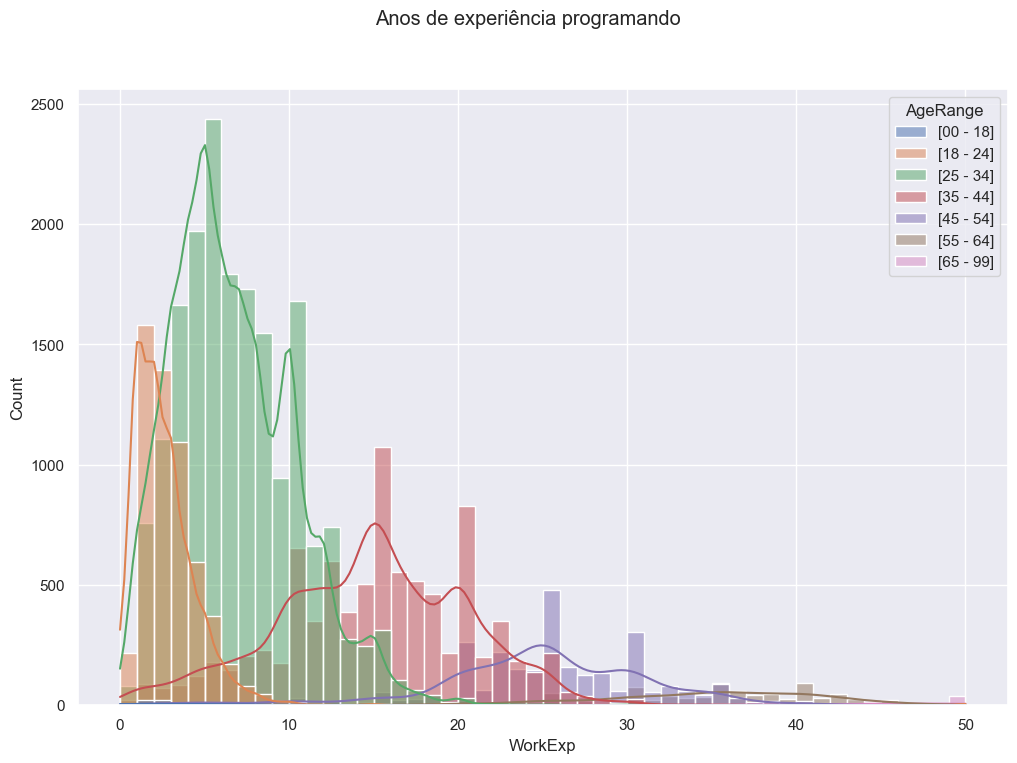

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

idades = sorted(df2['AgeRange'].unique())

sns.histplot(data=df2, ax=ax, x='WorkExp', hue='AgeRange', binwidth=1, kde=True, hue_order=idades)
fig.suptitle('Anos de experiência programando')

plt.show()

Como seria natural de esperar, pessoas mais velhas estão há mais tempo no mercado de trabalho.

Note que a altura dos histogramas estão diferentes. Isso acontece porque o eixo Y representa a contagem em cada *bin*, portanto categorias com contagens mais baixas terão histogramas de altura menor.

Se quisermos comparar os histogramas em termos relativos, temos que mudar alguns argumentos de `sns.histplot`:

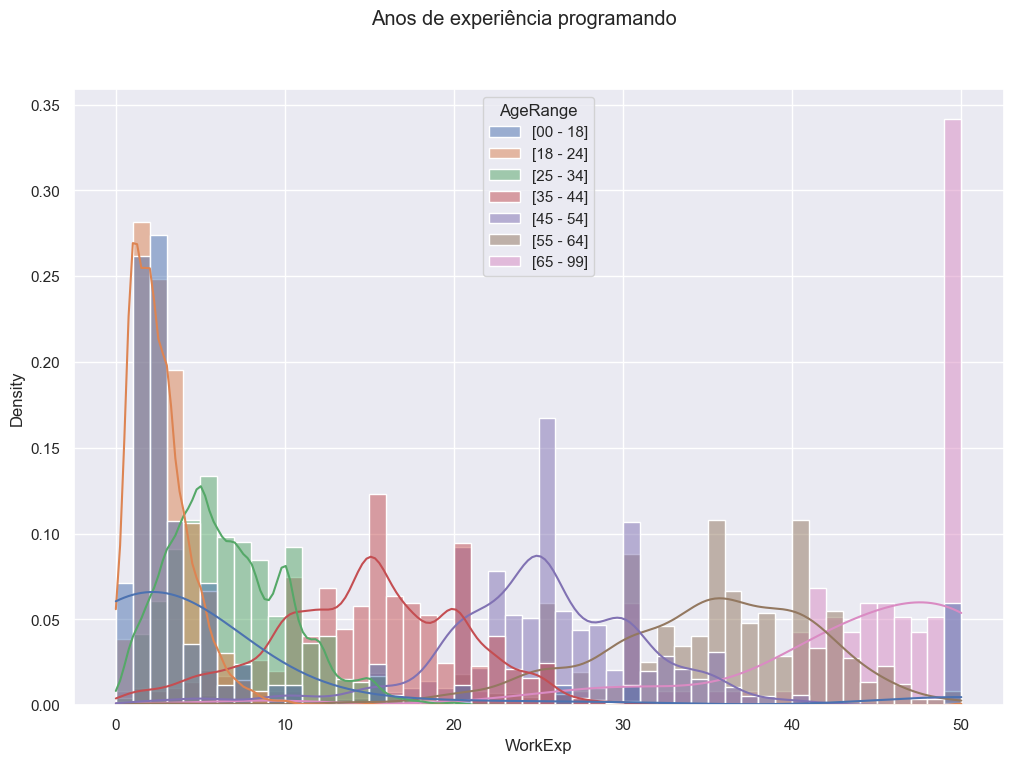

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

idades = sorted(df2['AgeRange'].unique())

sns.histplot(data=df2, ax=ax, x='WorkExp', hue='AgeRange', binwidth=1, kde=True, hue_order=idades, stat='density', common_norm=False)
fig.suptitle('Anos de experiência programando')

plt.show()

### Comparando histogramas por tipo de trabalho

Outra variável interessante é o tipo de trabalho dos entrevistados: presencial, remoto, ou misto (coluna `RemoteWork`).

Vamos observar os valores na coluna:

In [11]:
df['RemoteWork'].value_counts(normalize=True, dropna=False).apply(lambda p: f'{100 * p:.2f}%')

RemoteWork
Fully remote                            34.59%
Hybrid (some remote, some in-person)    34.15%
NaN                                     19.53%
Full in-person                          11.73%
Name: proportion, dtype: object

As categorias estão ok, mas 19% dos dados não foram preenchidos. Para evitar a criação de suposições erradas, vamos trabalhar apenas com os dados que foram de fato preenchidos.

Para nossa sorte, as funções de plotagem do `matplotlib` e `seaborn` já filtram dados nulos do gráfico final. Portanto, não precisamos nos preocupar em filtar os valores nulos manualmente.

Plotando os dados pela coluna de tipo de trabalho, temos:

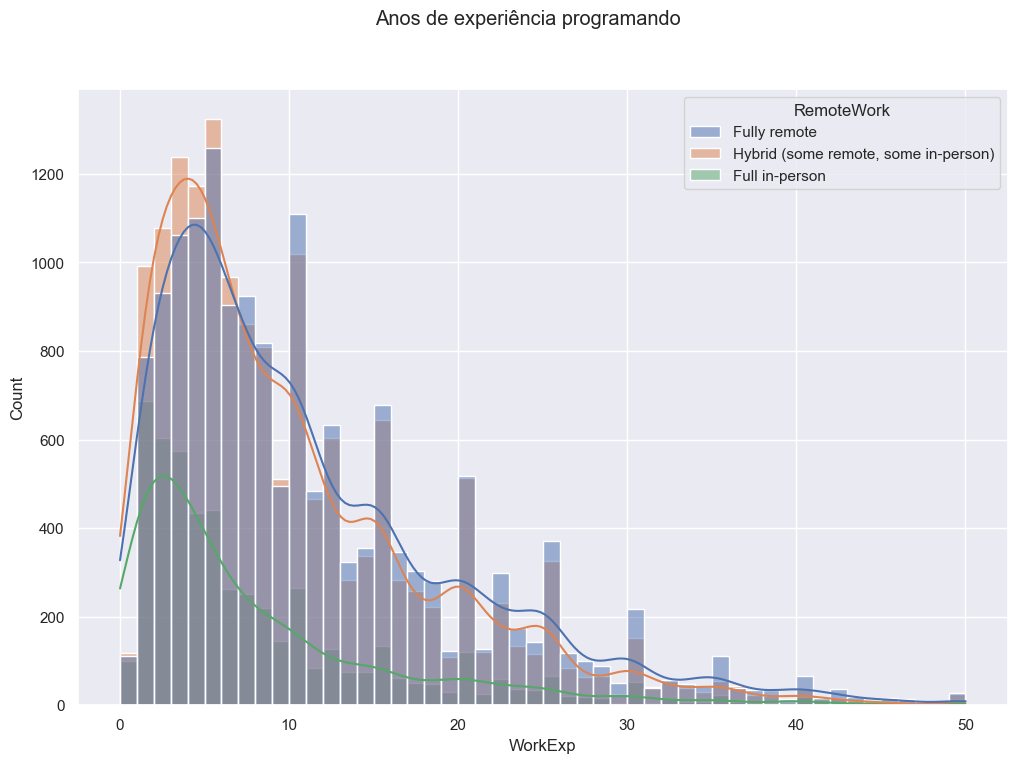

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df, ax=ax, x='WorkExp', hue='RemoteWork', binwidth=1, kde=True)
fig.suptitle('Anos de experiência programando')

plt.show()

E normalizando os histogramas:

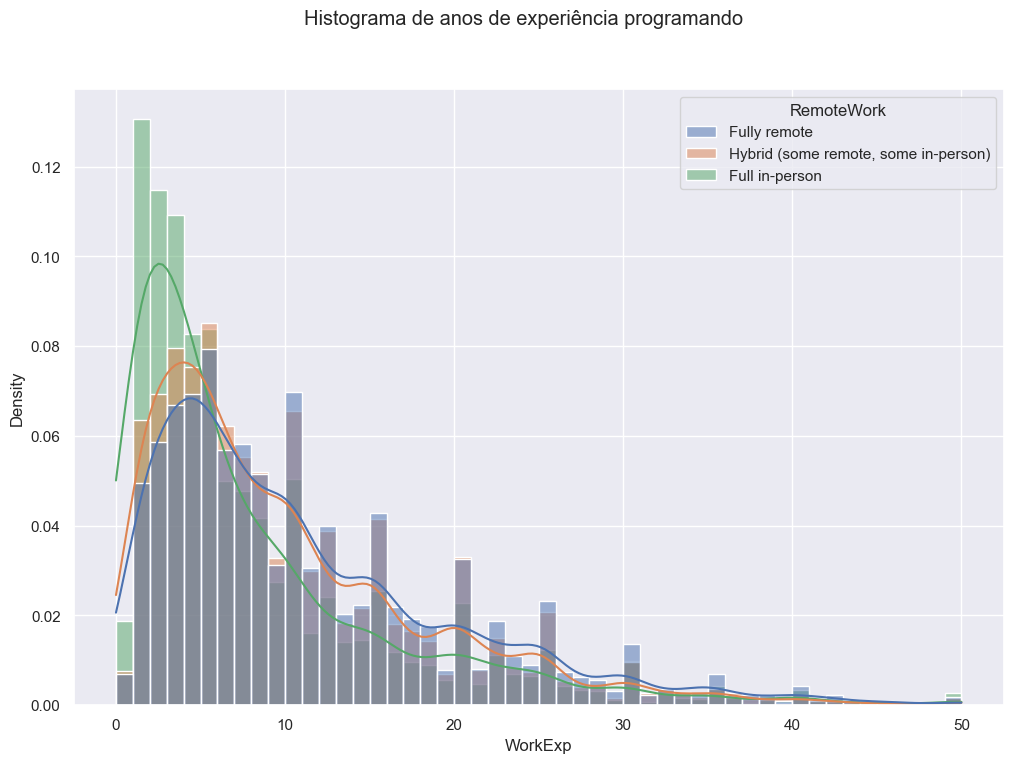

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df, ax=ax, x='WorkExp', hue='RemoteWork', binwidth=1, kde=True, common_norm=False, stat='density')
fig.suptitle('Histograma de anos de experiência programando')

plt.show()

Os histogramas estão bem sobrepostos, mas as linhas do KDE mostram haver uma ligeira preferência por trabalho presencial até 5 anos de profissão. A partir deste ponto, os desenvolvedores passam a trabalhar de forma remota, sendo que vagas 100% remotas são a preferência.